### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym
from scipy import signal
import cmath

In [2]:
s = sym.Symbol('s')
z = sym.Symbol('z')
e = sym.Symbol('e')
k = sym.Symbol('K')
alpha = sym.Symbol('a')
beta = sym.Symbol('b')
j = sym.Symbol('j')

### Visualizando G(s)

In [3]:
zohContinous = (1 - e**(1*s)) / s
gs = 1 / (s*(s+1))
print('G(s):')
gs

G(s):


1/(s*(s + 1))

C:\Users\andre.leite_dp6\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


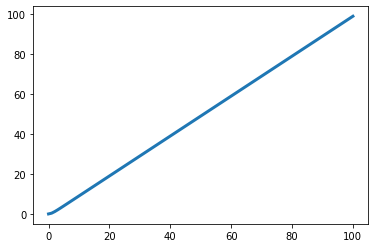

In [4]:
continousSignal = signal.TransferFunction([0, 0, 1], [1, 1, 0])
t, x = continousSignal.step(T=np.linspace(0, 100, 100))
fig, ax = plt.subplots()
ax.plot(t, x, label='Continuous', linewidth=3)

### Pólos em S

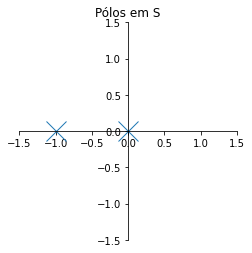

In [5]:
figure, axes = plt.subplots( 1 ) 
  
axes.set_aspect( 1 )
axes.plot([0, -1], [0, 0], marker='x', ls='none', ms=20)

plt.xlim( -1.5 , 1.5 ) 
plt.ylim( -1.5 , 1.5 )

ax = plt.gca()  # gca significa 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
  
plt.title( 'Pólos em S' ) 
plt.show() 

### Realizando Discretização

In [6]:
# Aplicando ZOH em G(s)
zohContinous = (1 - e**(1*s)) / s
gs = 1 / (s*(s+1))
gsZoh = zohContinous*gs
print('ZOH * GS: ')
gsZoh

ZOH * GS: 


(1 - e**s)/(s**2*(s + 1))

In [7]:
# Equação de G(s)*ZOH após transformada Z
gz = ((0.3679 * z**-1) * (1 + 0.718*z**-1)) / ((1 - z**-1) * (1 - 0.3679*z**-1))
print('G(z): ')
gz

G(z): 


0.3679*(1 + 0.718/z)/(z*(1 - 1/z)*(1 - 0.3679/z))

In [8]:
gz = (0.3679 * (z + 0.718)) / ((z-1) * (z-0.3679))
polosGZ = [[1, 0], [0.3679, 0]]
zerosGZ = -0.718
print('G(z):')
gz.simplify()

G(z):


(0.3679*z + 0.2641522)/((z - 1)*(z - 0.3679))

### Pólos e Zeros em Z no círculo unitário

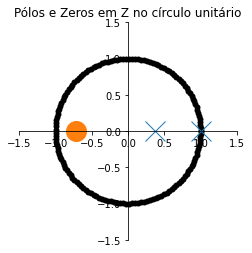

In [9]:
theta = np.linspace( 0 , 2 * np.pi , 150 ) 
  
radius = 1
  
a = radius * np.cos( theta ) 
b = radius * np.sin( theta ) 
  
figure, axes = plt.subplots( 1 ) 
  
axes.scatter( a, b, color='#000000', linewidths=0.0005 ) 
axes.set_aspect( 1 )
axes.plot([1, 0.3679], [0, 0], marker='x', ls='none', ms=20)
axes.plot([-0.718], [0], marker='o', ls='none', ms=20)

plt.xlim( -1.5 , 1.5 ) 
plt.ylim( -1.5 , 1.5 )

ax = plt.gca()  # gca significa 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
  
plt.title( 'Pólos e Zeros em Z no círculo unitário' ) 
plt.show() 

### Encontrando o ponto P (Utilizando método do lugar das raízes)

In [10]:
damping = 0.5
t = 0.8
ts = 2
wn = 4 / (ts * damping)
wd = wn * np.sqrt(1 - damping**2)
ws = (2 * np.pi) / t
n = ws / wd
modZ = np.exp(-t*damping*wn)
angZ = 360 * (wd/ws)
pointP = cmath.rect(modZ, np.deg2rad(angZ))
pointP

(-0.1882109034271204+0.07306750173307804j)

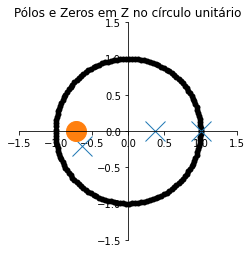

In [11]:
theta = np.linspace( 0 , 2 * np.pi , 150 ) 

radius = 1

a = radius * np.cos( theta ) 
b = radius * np.sin( theta ) 

figure, axes = plt.subplots( 1 ) 

axes.scatter( a, b, color='#000000', linewidths=0.0005 ) 
axes.set_aspect( 1 )
axes.plot([1, 0.3679, -0.6357604866988829], [0, 0, -0.21245603702794907], marker='x', ls='none', ms=20)
axes.plot([-0.718], [0], marker='o', ls='none', ms=20)

plt.xlim( -1.5 , 1.5 ) 
plt.ylim( -1.5 , 1.5 )

ax = plt.gca()  # gca significa 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.title( 'Pólos e Zeros em Z no círculo unitário' ) 
plt.show()

### Encontrando o ângulo de compensação

In [14]:
theta1 = np.rad2deg(np.arctan(pointP.imag / (pointP.real - zerosGZ)))
theta2 = 180 - np.rad2deg(np.arctan(pointP.imag / (pointP.real - polosGZ[1][0])))
theta3 = 180 - np.rad2deg(np.arctan(pointP.imag / (polosGZ[0][0] - pointP.real)))
thetaP = theta1 - theta2 - theta3
compensateAngle = thetaP + 180

In [15]:
print("Fórmula do Ganho")
(z+alpha) / (z+beta) 

Fórmula do Ganho


(a + z)/(b + z)

### Pólos e Zeros do Controlador

In [16]:
controllerPole = -((pointP.imag/np.tan(-compensateAngle)) - pointP.real)
controllerZero = polosGZ[1][0]

In [26]:
print('Gd * Gz')
k * ((z + controllerZero) / (z + controllerPole)) * ((0.3679*z + 0.2641522) / ((z-1)*(z-0.3679)))

Gd * Gz


K*(0.3679*z + 0.2641522)*(z + 0.3679)/((z - 1)*(z - 0.579625249617318)*(z - 0.3679))

#### Substituindo o valor do ponto P no lugar de z, e igualando a função a 1

In [18]:
kValue = -((pointP - 1) * (pointP - controllerPole)) / ((0.3679 * pointP) + 0.2641522)
print('K=')
kValue

K=


(2.4089155347938904-0.03353050424847111j)

In [19]:
# Convertendo K para polar para utilizarmos o valor do modulo
KValue = cmath.polar(kValue)
Kv = KValue[0]
Kv

2.409148884665805

In [20]:
gdgz = Kv * ((z - controllerZero) / (z - controllerPole)) * ((0.3679*z + 0.2641522) / ((z-1)*(z-0.3679)))
ft = gdgz / (1 + gdgz)
print('Função de Transferência:')
ft.simplify()

Função de Transferência:


(0.88632587466855*z + 0.636381978012019)/(1.0*z**2 + 0.465951124285867*z + 0.056756728394701)

### Sinal Contínuo com Controlador

C:\Users\andre.leite_dp6\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


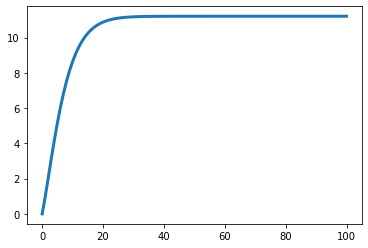

In [21]:
continousSignal = signal.TransferFunction([0, 0.88632587466855, 0.636381978012019], [1.0, 0.465951124285867, 0.056756728394701])
t, x = continousSignal.step(T=np.linspace(0, 100, 100))
fig, ax = plt.subplots()
ax.plot(t, x, label='Continuous', linewidth=3)

### Sinal Discretizado com Segurador de Ordem Zero

C:\Users\andre.leite_dp6\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
C:\Users\andre.leite_dp6\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


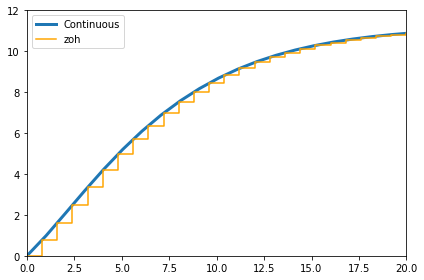

In [22]:
continousSignal = signal.TransferFunction([0, 0.88632587466855, 0.636381978012019], [1.0, 0.465951124285867, 0.056756728394701])
t, x = continousSignal.step(T=np.linspace(0, 100, 100))
fig, ax = plt.subplots()
ax.plot(t, x, label='Continuous', linewidth=3)

methods = ['zoh', 'bilinear', 'euler']
discreteSignal = signal.cont2discrete(([0, 0.88632587466855, 0.636381978012019], [1.0, 0.465951124285867, 0.056756728394701]), dt=0.8, method='zoh')
s, x_d = signal.dstep(discreteSignal)
ax.step(s, np.squeeze(x_d), label='zoh', color='orange', where='post')
ax.axis([t[0], 20, x[0], 12])
ax.legend(loc='best')
fig.tight_layout()
plt.show()

### Sinal Discretizado - Método Tustin

C:\Users\andre.leite_dp6\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
C:\Users\andre.leite_dp6\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


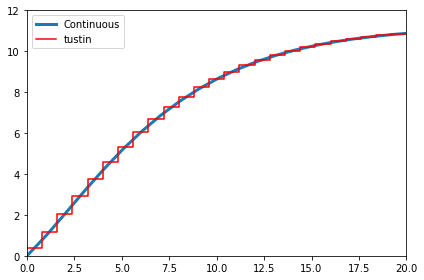

In [23]:
continousSignal = signal.TransferFunction([0, 0.88632587466855, 0.636381978012019], [1.0, 0.465951124285867, 0.056756728394701])
t, x = continousSignal.step(T=np.linspace(0, 100, 100))
fig, ax = plt.subplots()
ax.plot(t, x, label='Continuous', linewidth=3)

methods = ['zoh', 'bilinear', 'euler']
discreteSignal = signal.cont2discrete(([0, 0.88632587466855, 0.636381978012019], [1.0, 0.465951124285867, 0.056756728394701]), dt=0.8, method='bilinear')
s, x_d = signal.dstep(discreteSignal)
ax.step(s, np.squeeze(x_d), label='tustin', color='red', where='post')
ax.axis([t[0], 20, x[0], 12])
ax.legend(loc='best')
fig.tight_layout()
plt.show()

### Sinal Discretizado - Método de Euler

C:\Users\andre.leite_dp6\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
C:\Users\andre.leite_dp6\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


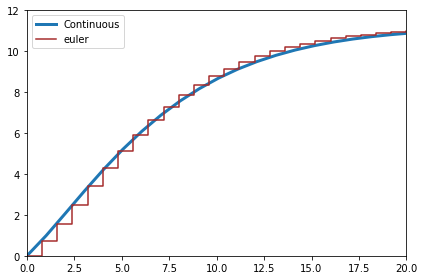

In [24]:
continousSignal = signal.TransferFunction([0, 0.88632587466855, 0.636381978012019], [1.0, 0.465951124285867, 0.056756728394701])
t, x = continousSignal.step(T=np.linspace(0, 100, 100))
fig, ax = plt.subplots()
ax.plot(t, x, label='Continuous', linewidth=3)

methods = ['zoh', 'bilinear', 'euler']
discreteSignal = signal.cont2discrete(([0, 0.88632587466855, 0.636381978012019], [1.0, 0.465951124285867, 0.056756728394701]), dt=0.8, method='euler')
s, x_d = signal.dstep(discreteSignal)
ax.step(s, np.squeeze(x_d), label='euler', color='brown', where='post')
ax.axis([t[0], 20, x[0], 12])
ax.legend(loc='best')
fig.tight_layout()
plt.show()